http://www.cs.toronto.edu/~tijmen/affNIST/

In [4]:
from lib import load_batch
b = load_batch(1)

Using TensorFlow backend.


In [83]:
b.image[0].shape

(40, 40)

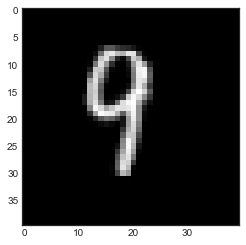

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.imshow(b.image[5], cmap='gray')

In [85]:
image = b.image.reshape(-1, 40, 40, 1)

In [ ]:
from keras.metrics import categorical_accuracy
import tensorflow
# _, test_x, _, test_y = d
test_x, _, test_y, _ = d
test_x, test_y = test_x[0:1000], test_y[0:1000]
pred_y = model.predict(test_x)
with tensorflow.Session():
    acc = categorical_accuracy(tensorflow.convert_to_tensor(test_y), tensorflow.convert_to_tensor(pred_y)).eval()
print(acc)

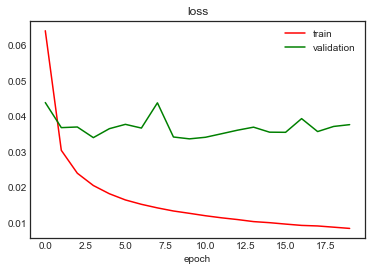

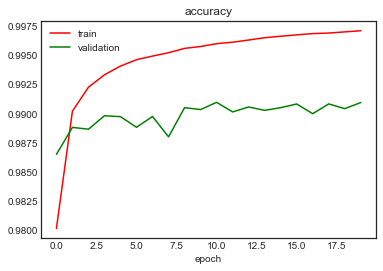

In [4]:
%matplotlib inline


import json
import numpy
from matplotlib import pyplot as plt
with open("my_hist.json") as f:
    hist = json.load(f)
plt.style.use('seaborn-white')
    
axis = numpy.arange(0, len(hist['val_categorical_accuracy']), 1)

plt.figure(1)
plt.title("loss")
plt.plot(axis, hist['loss'], 'r', label='train')
plt.plot(axis, hist['val_loss'], 'g', label='validation')
plt.xlabel("epoch")
plt.legend() # loc='lower center', bbox_to_anchor=(1, 0))


plt.figure(2)
plt.title("accuracy")
plt.plot(axis, hist['categorical_accuracy'], 'r', label='train')
plt.plot(axis, hist['val_categorical_accuracy'], 'g', label='validation')
plt.xlabel("epoch")
plt.legend()

In [3]:
print("Final validation loss:", hist["val_loss"][-1])
print("Final validation accuracy", hist["val_categorical_accuracy"][-1])

Final validation loss: 0.03368460969536987
Final validation accuracy 0.9903541666666666


In [78]:
from keras.models import load_model
model = load_model("my_model.h5")

In [40]:
print(model.flattened_layers[3])
print(model.flattened_layers[3].get_weights())

[]


In [79]:
from keras.models import Sequential

In [80]:
new_model = Sequential()
for l in model.flattened_layers[:10]:
    new_model.add(l)
new_model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [86]:
out = new_model.predict(image[0:100])


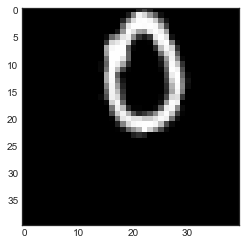

In [87]:
plt.imshow(image[0, :, :, 0], cmap='gray')


(100, 5, 5, 32)


/Users/michal/.virtualenvs/ml1617/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


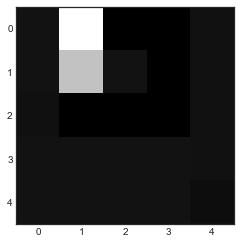

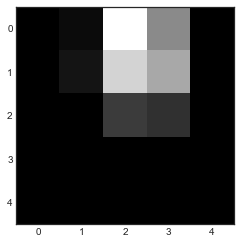

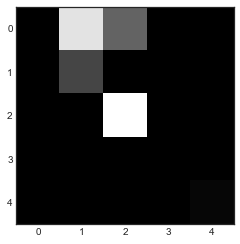

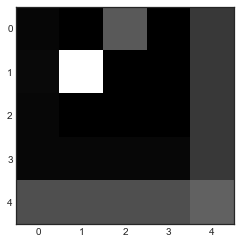

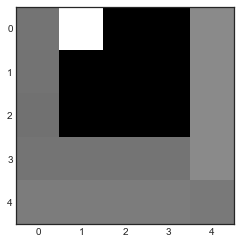

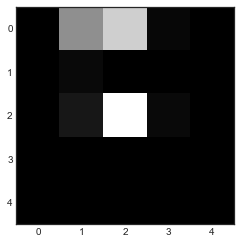

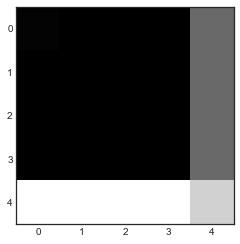

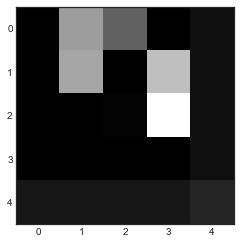

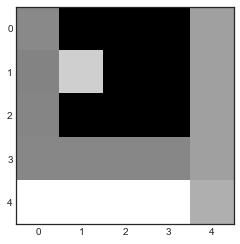

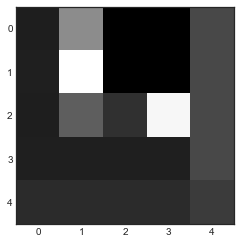

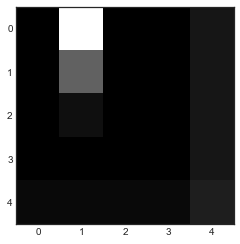

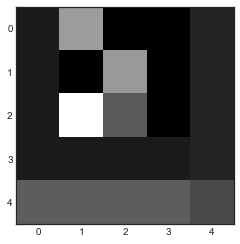

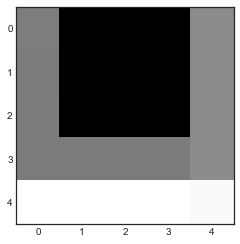

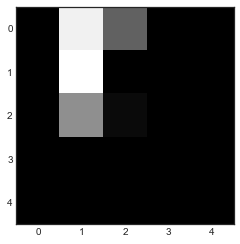

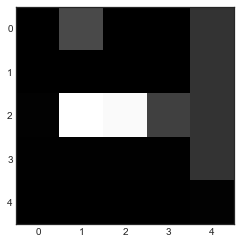

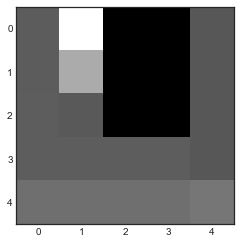

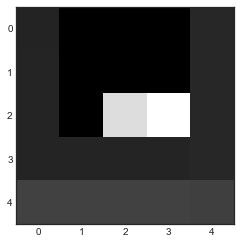

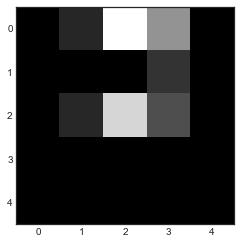

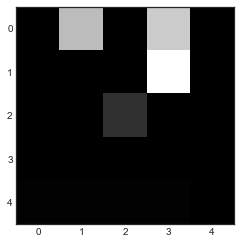

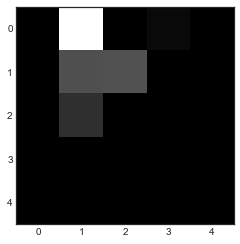

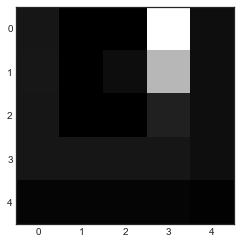

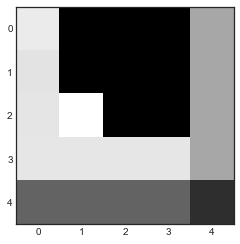

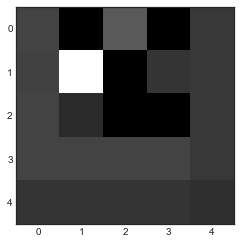

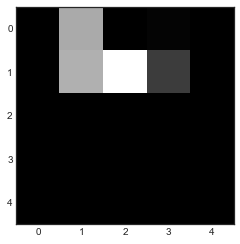

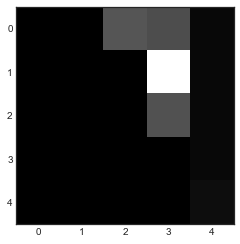

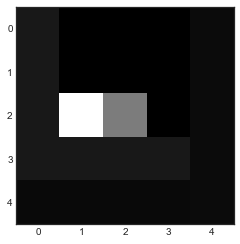

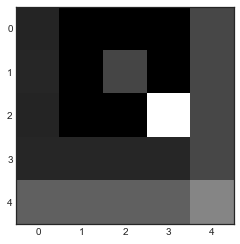

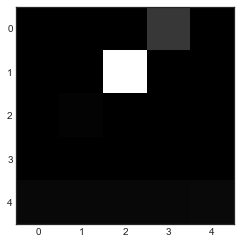

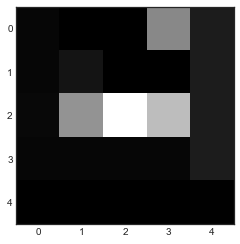

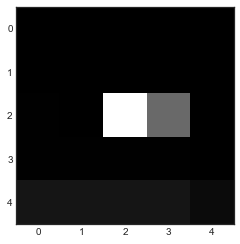

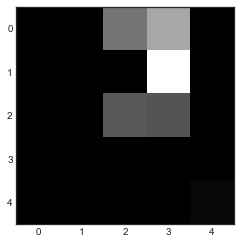

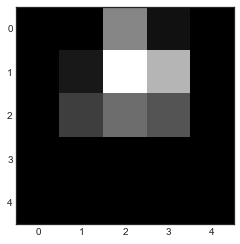

In [85]:
print(out.shape)
for t in range(0, out.shape[3]):
    plt.figure()
    plt.imshow(out[0, :, :, t], cmap='gray')

In [3]:
from loadmat import my_loadmat

In [13]:
m = my_loadmat("data/training_and_validation_batches/6.mat")
print(m['affNISTdata']['original_id'])
m = my_loadmat("data/training_and_validation_batches/8.mat")
print(m['affNISTdata']['original_id'])

[    1     2     3 ..., 59998 59999 60000]
[    1     2     3 ..., 59998 59999 60000]


In [50]:
import pandas
chunk = next(pandas.read_csv("data/test.csv", chunksize=10000))

In [51]:
images = chunk.as_matrix()[:, 1:].reshape(-1, 40, 40, 1)

In [44]:
out = model.predict_classes(images)

 96/100 [===========================>..] - ETA: 0s

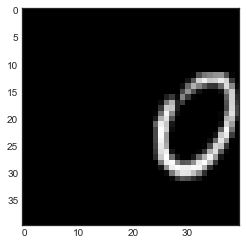

In [48]:
plt.imshow(images[0].reshape(40, 40), cmap='gray')

In [76]:
make_submission(model)

10000/10000 [==============================] - 8s      

/Users/michal/.virtualenvs/ml1617/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


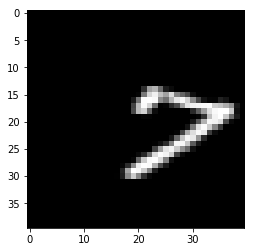

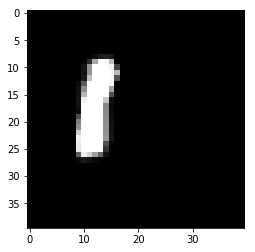

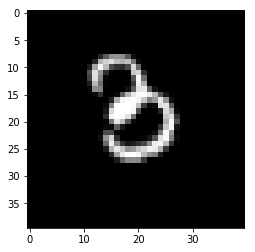

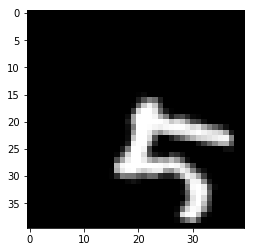

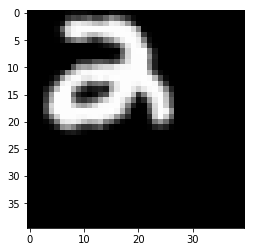

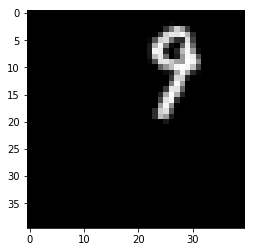

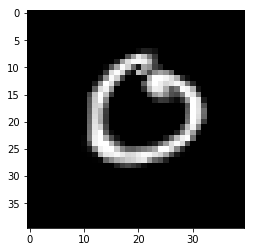

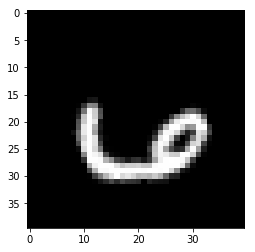

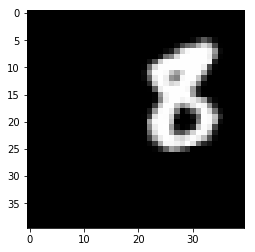

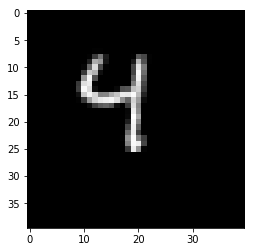

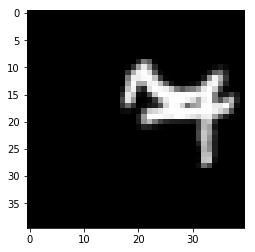

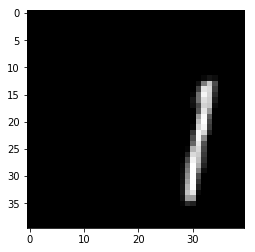

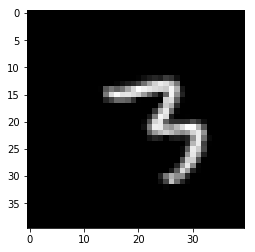

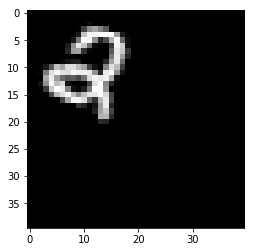

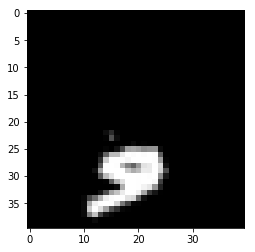

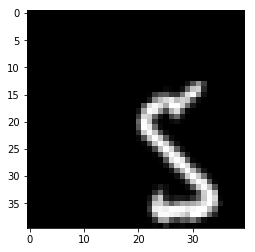

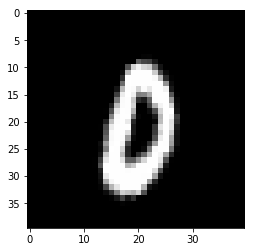

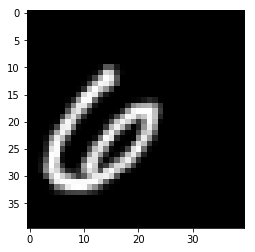

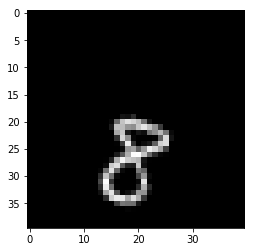

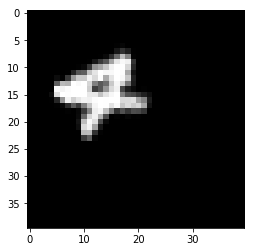

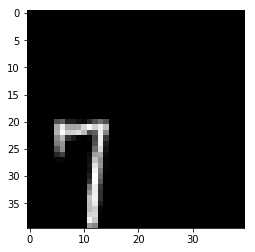

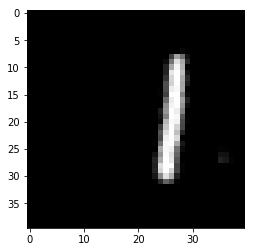

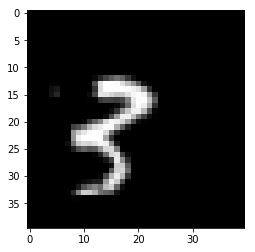

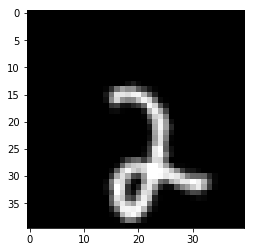

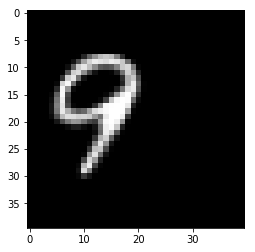

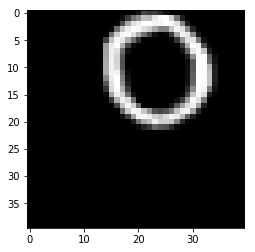

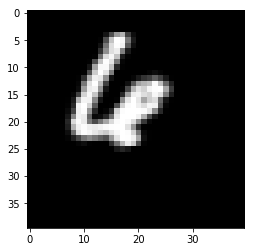

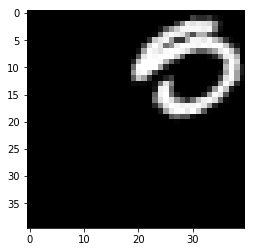

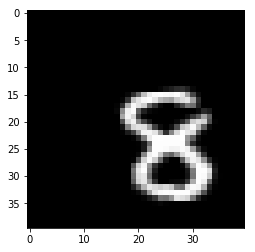

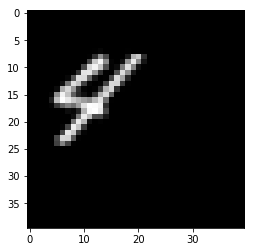

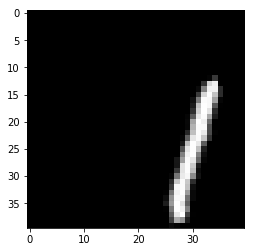

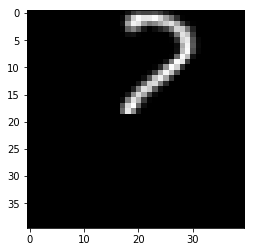

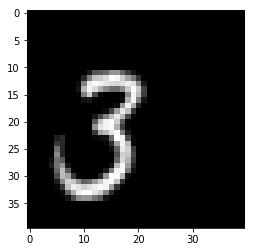

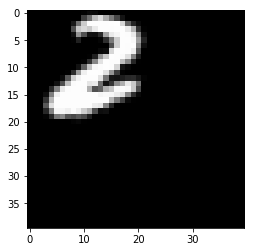

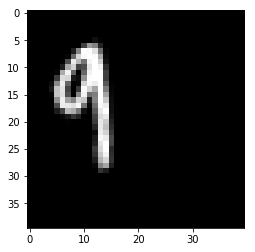

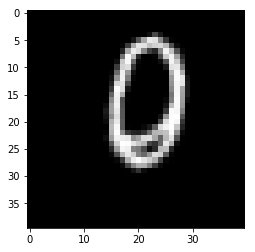

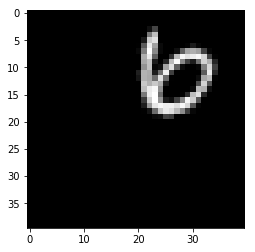

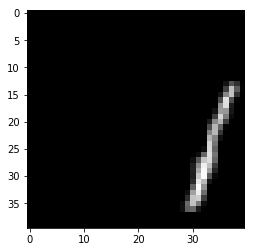

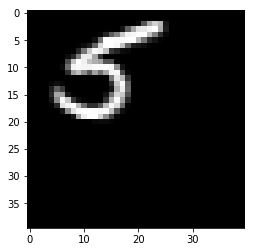

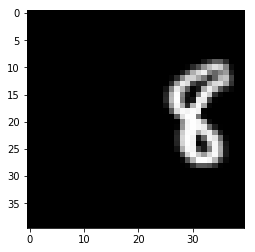

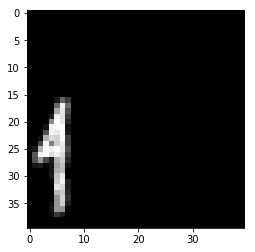

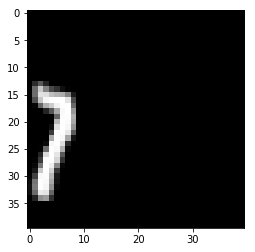

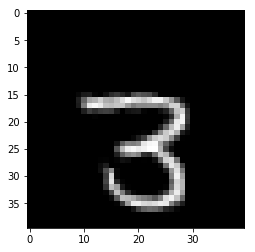

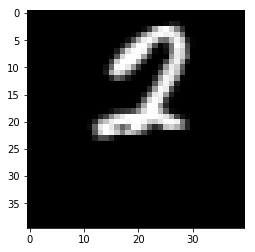

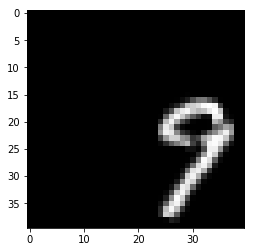

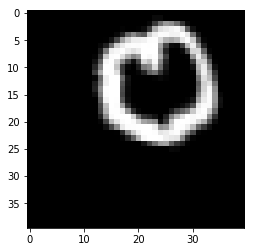

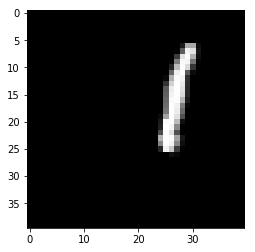

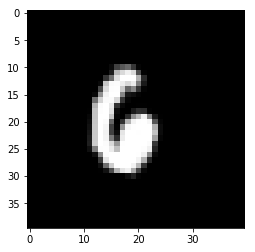

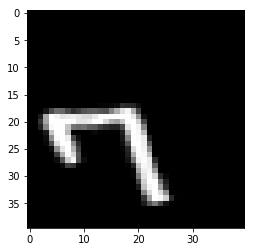

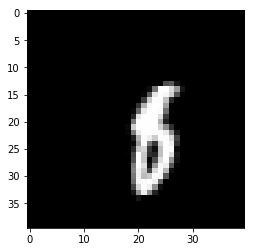

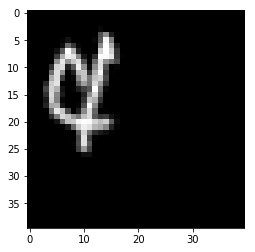

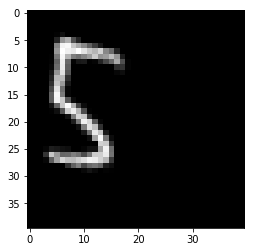

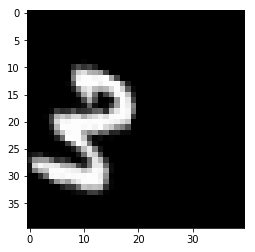

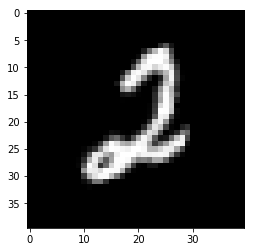

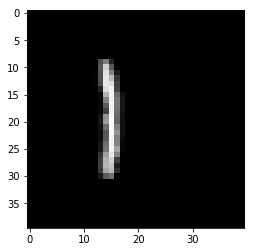

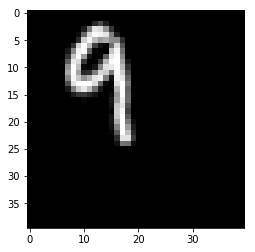

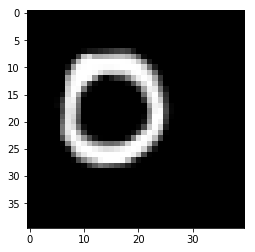

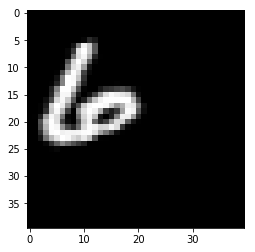

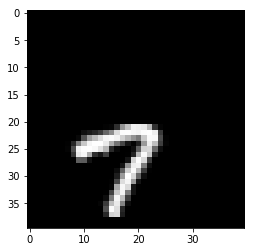

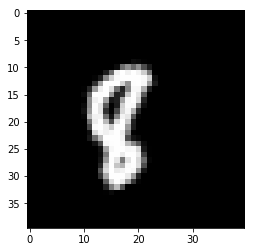

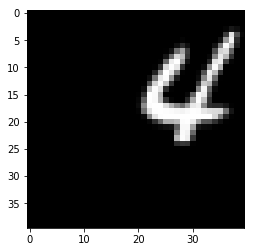

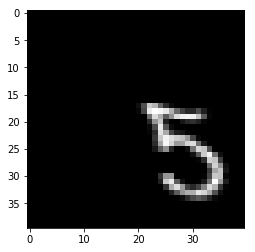

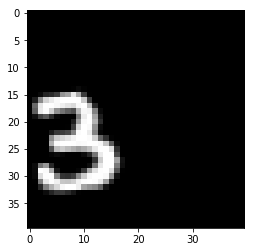

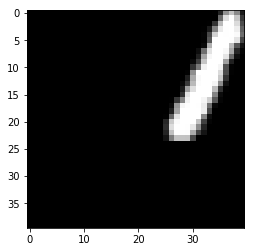

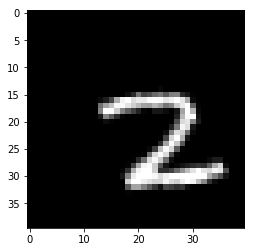

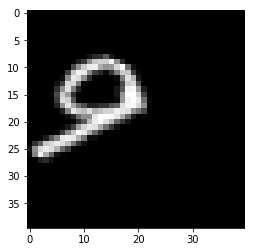

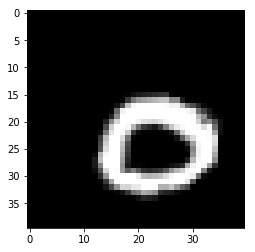

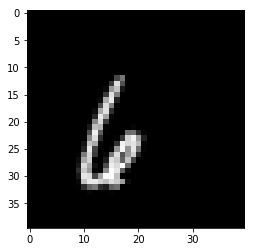

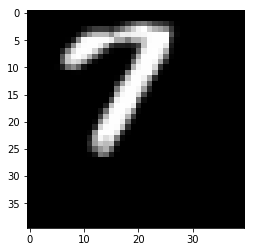

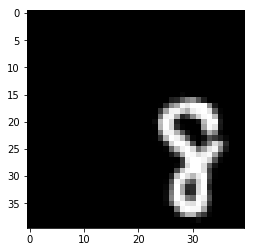

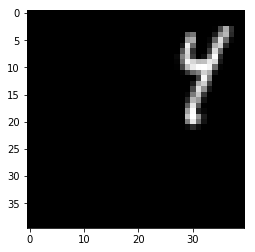

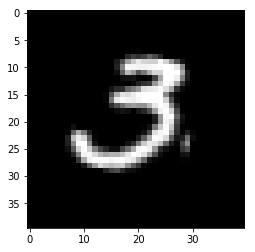

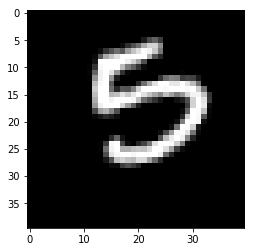

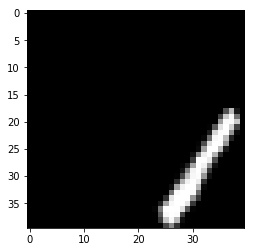

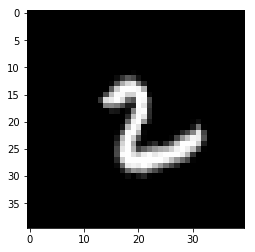

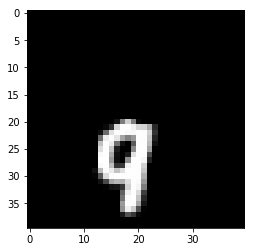

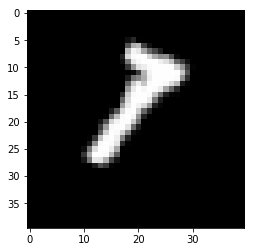

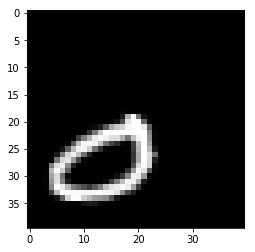

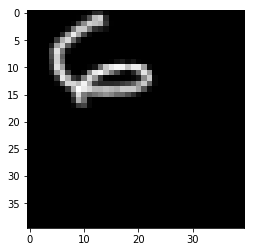

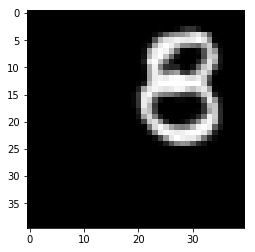

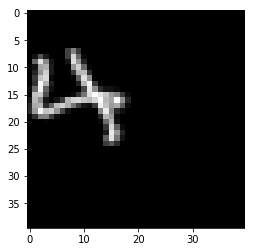

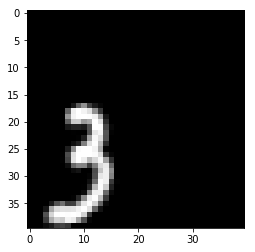

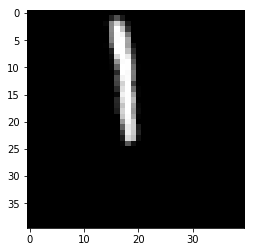

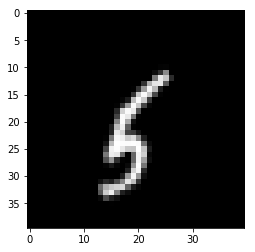

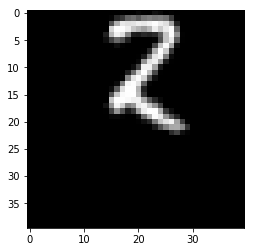

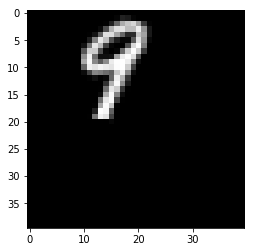

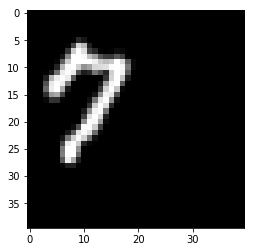

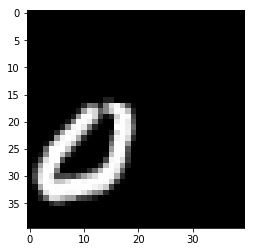

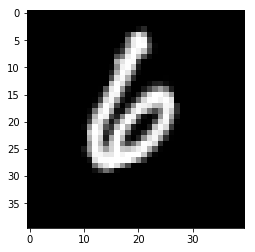

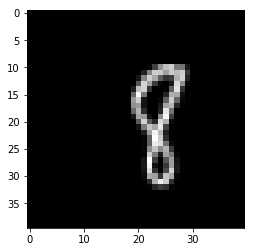

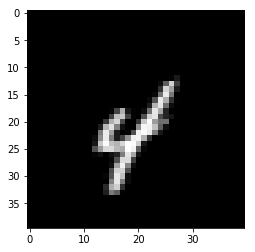

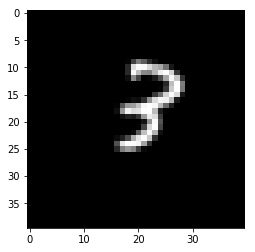

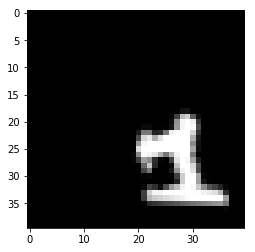

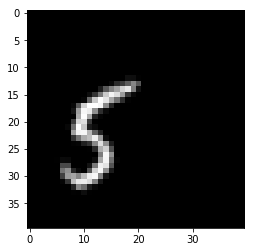

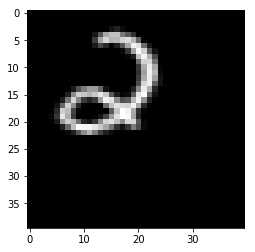

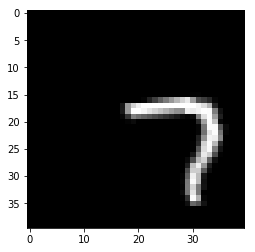

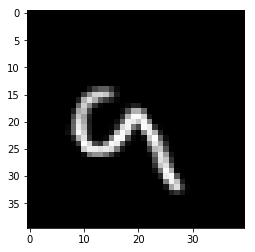

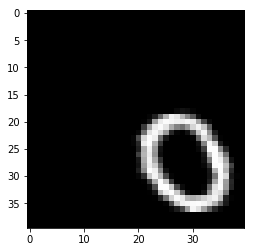

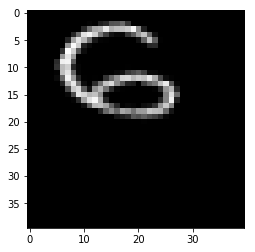

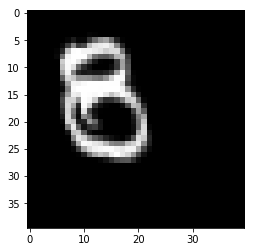

In [4]:
%matplotlib inline
from matplotlib import pyplot

from lib import load_batch
images = load_batch(1).image

for img in images[100:200]:
    pyplot.figure()
    imshow(img)

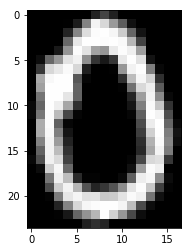

In [2]:
from lib import imshow, autocrop
imshow(autocrop(images[0]))

In [2]:
import numpy
from lib import getbbox, load_batch

def batch_height_width(num):
    b = load_batch(num)
    for image in b.image:
        bbox = getbbox(image)
        height, width = bbox[1] - bbox[0], bbox[3] - bbox[2]
        yield height, width

def get_batches_height_width():
    for batch_num in range(1, 33):
        b = numpy.array(list(batch_height_width(batch_num)))
        yield b
        
b = numpy.array(list(get_batches_height_width()))
b.max(axis=0).max(axis=0)  # [32, 30]

array([34, 32])

In [2]:
import pandas
def get_test_sizes():
    for chunk in pandas.read_csv("data/test.csv", chunksize=1000):
        chunk = chunk.values
        for image in chunk:
            assert image.shape == (1601,)
            image = image[1:].reshape(40, 40)
            bbox = getbbox(image)
            height, width = bbox[1] - bbox[0], bbox[3] - bbox[2]
            yield height, width
a = numpy.array(list(get_test_sizes()))

In [3]:
a.shape

(320000, 2)

In [4]:
a.max(axis=0)

array([34, 32])

In [40]:
image[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Using TensorFlow backend.


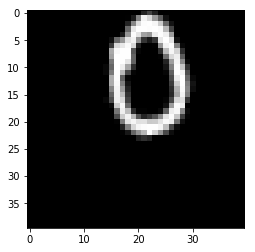

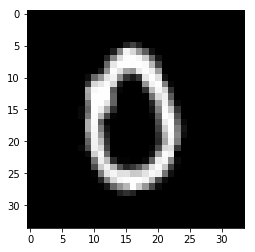

In [1]:
from lib import load_batch
b = load_batch(1)
orig_img = b.image[0]
from lib import center
img = center(orig_img)
from lib import imshow
%matplotlib inline
imshow(orig_img)
from matplotlib import pyplot
pyplot.figure()
imshow(img)

In [1]:
from lib import load_data, array_center
d = load_data(1, 2)[0][0]
print(d.shape)
array_center(d)


Using TensorFlow backend.


(60000, 40, 40, 1)


array([[[[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        ..., 
        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ..., 
         [0],
         [0],
         [0]],

        ..., 
        [[0],
         [0],
         [0],
         ..., 
    